In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/transactions.csv')
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,description,withdrawals,deposits,balance,transaction_type,day,month,year,day_of_week
0,2024-10-01,Point of sale purchase Apos Granville Is lan V...,4.99,NaN,559.18,withdrawal,1,10,2024,1
1,2024-10-01,Point of sale purchase O posA BC Golds Gym 604...,27.29,NaN,531.89,withdrawal,1,10,2024,1
2,2024-10-01,Withdrawal 84938279 Free Interac E Transfer,30.00,NaN,501.89,withdrawal,1,10,2024,1
3,2024-10-04,Point of sale purchase Apos International D No...,20.00,NaN,481.89,withdrawal,4,10,2024,4
4,2024-10-04,Point of sale purchase Apos Shoppers Drug M Va...,19.94,NaN,461.95,withdrawal,4,10,2024,4


In [5]:
df.head(10)
df.shape

(549, 10)

In [7]:
# Quick overview
print("Data Shape:", df.shape)
print("Columns in Data:", df.columns)
print(df.info())
print(df.head())


Data Shape: (549, 10)
Columns in Data: Index(['date', 'description', 'withdrawals', 'deposits', 'balance',
       'transaction_type', 'day', 'month', 'year', 'day_of_week'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              549 non-null    datetime64[ns]
 1   description       549 non-null    object        
 2   withdrawals       441 non-null    float64       
 3   deposits          108 non-null    float64       
 4   balance           549 non-null    float64       
 5   transaction_type  549 non-null    object        
 6   day               549 non-null    int64         
 7   month             549 non-null    int64         
 8   year              549 non-null    int64         
 9   day_of_week       549 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(4), ob

In [9]:
# Check for missing values
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)

# Descriptive statistics
print("Summary Statistics:\n")
df.describe()

Missing Data:
 date                  0
description           0
withdrawals         108
deposits            441
balance               0
transaction_type      0
day                   0
month                 0
year                  0
day_of_week           0
dtype: int64
Summary Statistics:



,date,withdrawals,deposits,balance,day,month,year,day_of_week
count,549,441.000000,108.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,2025-02-02 00:44:35.409836032,177.507302,289.477407,450.461184,15.225865,6.905282,2024.559199,2.091075
min,2024-08-02 00:00:00,0.050000,0.000000,-248.340000,1.000000,1.000000,2024.000000,0.000000
25%,2024-10-23 00:00:00,6.980000,21.037500,45.500000,7.000000,5.000000,2024.000000,0.000000
50%,2025-01-21 00:00:00,20.000000,50.000000,97.160000,15.000000,7.000000,2025.000000,2.000000
75%,2025-05-22 00:00:00,50.000000,100.000000,299.370000,23.000000,9.000000,2025.000000,4.000000
max,2025-07-30 00:00:00,7386.770000,4000.000000,7482.700000,31.000000,12.000000,2025.000000,5.000000
std,NaN,671.154368,735.973064,935.243649,8.858992,3.169504,0.496936,1.841060


In [10]:
# Aggregate totals
total_withdrawals = df['withdrawals'].sum()
total_deposits = df['deposits'].sum()
ending_balance = df['balance'].iloc[-1]  # Last balance value

print(f"Total Withdrawals: ${total_withdrawals:,.2f}")
print(f"Total Deposits: ${total_deposits:,.2f}")
print(f"Ending Balance: ${ending_balance:,.2f}")

# Find largest transactions
max_withdrawal = df.loc[df['withdrawals'].idxmax()]
max_deposit = df.loc[df['deposits'].idxmax()]

print("Largest Withdrawal:\n", max_withdrawal)
print("Largest Deposit:\n", max_deposit)

Total Withdrawals: $78,280.72
Total Deposits: $31,263.56
Ending Balance: $132.42
Largest Withdrawal:
 date                          2025-07-14 00:00:00
description         Misc payment U bc Tuition Ref
withdrawals                               7386.77
deposits                                      NaN
balance                                    7482.7
transaction_type                       withdrawal
day                                            14
month                                           7
year                                         2025
day_of_week                                     0
Name: 394, dtype: object
Largest Deposit:
 date                          2025-06-09 00:00:00
description         MB Transfer from 232001691155
withdrawals                                   NaN
deposits                                   4000.0
balance                                   4059.25
transaction_type                          deposit
day                                             9
month

In [11]:
max_deposit

date                          2025-06-09 00:00:00
description         MB Transfer from 232001691155
withdrawals                                   NaN
deposits                                   4000.0
balance                                   4059.25
transaction_type                          deposit
day                                             9
month                                           6
year                                         2025
day_of_week                                     0
Name: 51, dtype: object

In [12]:
max_withdrawal

date                          2025-07-14 00:00:00
description         Misc payment U bc Tuition Ref
withdrawals                               7386.77
deposits                                      NaN
balance                                    7482.7
transaction_type                       withdrawal
day                                            14
month                                           7
year                                         2025
day_of_week                                     0
Name: 394, dtype: object

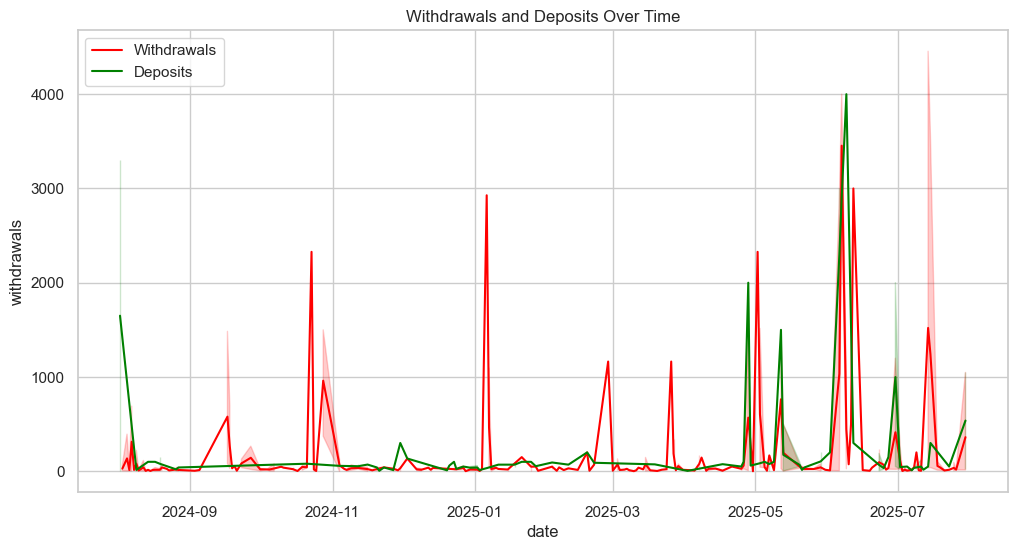

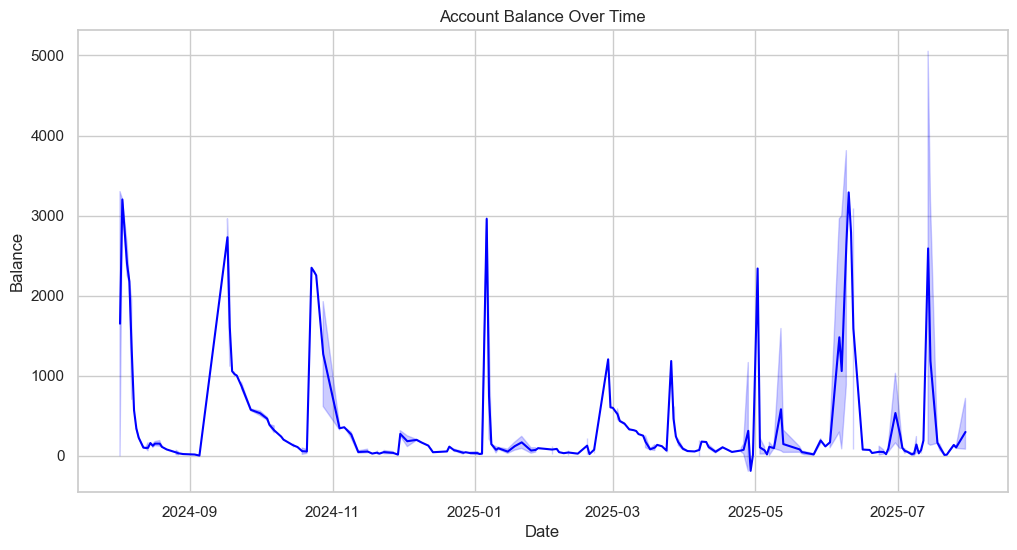

In [14]:
# Set up the plot style
sns.set(style="whitegrid")

# Plot deposits and withdrawals over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='withdrawals', label='Withdrawals', data=df, color='red')
sns.lineplot(x='date', y='deposits', label='Deposits', data=df, color='green')
plt.title('Withdrawals and Deposits Over Time')
plt.legend()
plt.show()

# Plot balance trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='balance', color='blue', data=df)
plt.title('Account Balance Over Time')
plt.xlabel('Date')
plt.ylabel('Balance')
plt.show()

Monthly Summary:
    month_year  withdrawals  deposits  balance
0     2024-08      3680.24   3734.00    21.43
1     2024-09      6321.66      0.00   564.17
2     2024-10      7913.12     80.00   448.99
3     2024-11      1177.26    806.09   249.42
4     2024-12       961.21    480.00    22.01
5     2025-01      6365.20    607.53    95.01
6     2025-02      2270.98    453.00   604.53
7     2025-03      2940.86     73.00    69.84
8     2025-04      3204.27   2288.99    11.52
9     2025-05      7518.68   2971.24   132.42
10    2025-06     17572.23  17818.50  1002.98
11    2025-07     18355.01   1951.21    84.30


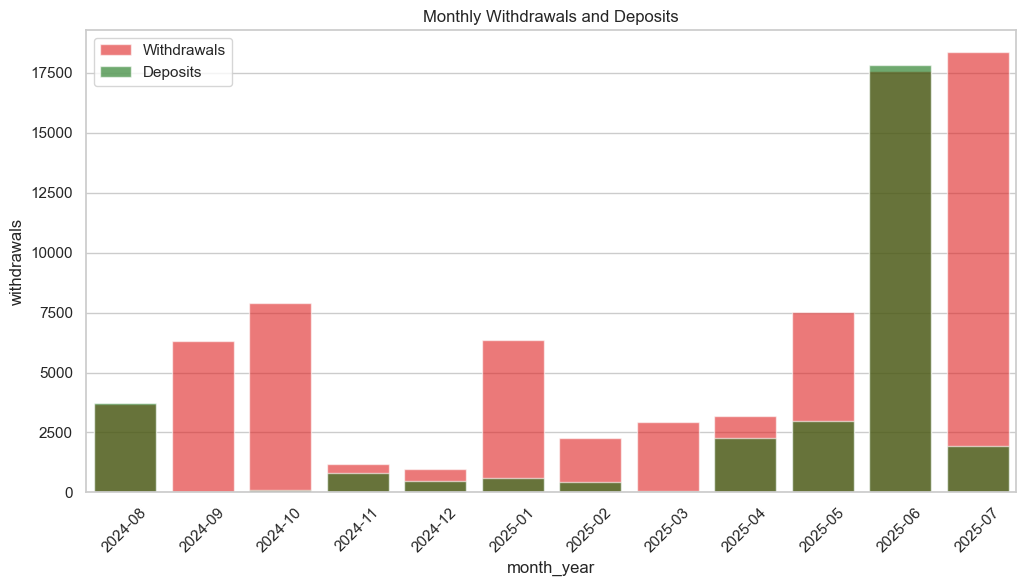

In [16]:
# Add 'month-year' column for aggregation
df['month_year'] = df['date'].dt.to_period('M')

# Aggregate withdrawals and deposits by month
monthly_summary = df.groupby('month_year').agg({
    'withdrawals': 'sum',
    'deposits': 'sum',
    'balance': 'last'  # Ending balance for the month
}).reset_index()

print("Monthly Summary:\n", monthly_summary)

# Plot monthly withdrawals and deposits
plt.figure(figsize=(12, 6))
sns.barplot(x='month_year', y='withdrawals', data=monthly_summary, color='red', alpha=0.6, label='Withdrawals')
sns.barplot(x='month_year', y='deposits', data=monthly_summary, color='green', alpha=0.6, label='Deposits')
plt.title('Monthly Withdrawals and Deposits')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [18]:
# Group by 'description' and get the total amount spent per category
category_summary = df.groupby('description').agg({
    'withdrawals': 'sum',
    'deposits': 'sum'
}).sort_values(by='withdrawals', ascending=False)

print("Top Spending Categories:\n", category_summary.head(10))

Top Spending Categories:
                                                     withdrawals  deposits
description                                                              
MB Transfer to 232001691155                            17447.00       0.0
Misc payment U bc Tuition Ref                          12711.59       0.0
Cash m gmt U bc Tuition                                 8482.50       0.0
MB Transfer to 232001691155 Checkout the offers...      4000.00       0.0
MB Transfer to Credit Card                              3293.68       0.0
Withdrawal 47864084 Free Interac E Transfer             3000.00       0.0
Withdrawal 38392536 Free Interac E Transfer             2907.24       0.0
MB Transfer to 232001691155 Take steps towards ...      2900.00       0.0
Withdrawal 29192813 Free Interac E Transfer             2000.00       0.0
Withdrawal 92937729 Free Interac E Transfer             1982.50       0.0


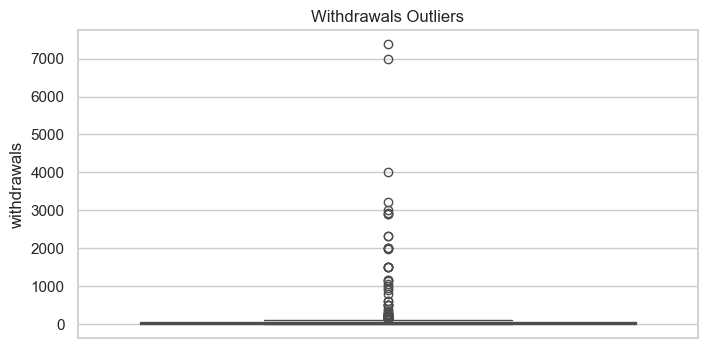

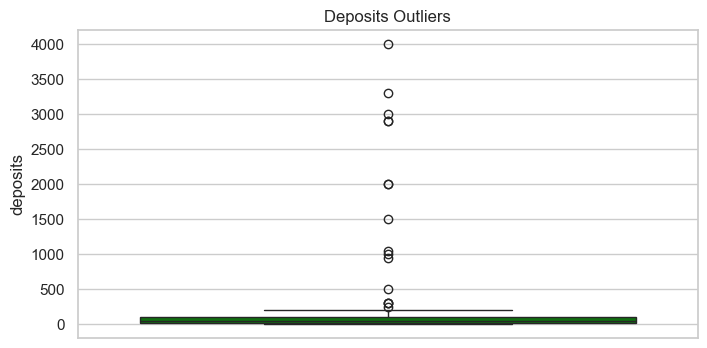

Unusually Large Withdrawals:
           date                                        description  \
27  2024-10-23                            Cash m gmt U bc Tuition   
33  2024-10-28                         MB Transfer to Credit Card   
34  2024-10-28          Error correction 54490486 MB Cash Advance   
35  2024-10-28                        MB Transfer to 232001691155   
42  2025-06-06  MB Transfer to 232001691155 Take steps towards...   
47  2025-06-07  MB Transfer to 232001691155 Checkout the offer...   
49  2025-06-07        Withdrawal 38392536 Free Interac E Transfer   
57  2025-06-12        Withdrawal 47864084 Free Interac E Transfer   
82  2025-06-30        Withdrawal 92937729 Free Interac E Transfer   
101 2025-02-27                      Misc payment U bc Tuition Ref   
163 2025-01-06                            Cash m gmt U bc Tuition   
166 2025-01-07                        MB Transfer to 232001691155   
343 2025-04-28        Withdrawal 29192813 Free Interac E Transfer   
394 

In [19]:
# Plot boxplots for outlier detection
plt.figure(figsize=(8, 4))
sns.boxplot(y='withdrawals', data=df, color='red')
plt.title('Withdrawals Outliers')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(y='deposits', data=df, color='green')
plt.title('Deposits Outliers')
plt.show()

# Investigate transactions with unusually high amounts
large_withdrawals = df[df['withdrawals'] > df['withdrawals'].quantile(0.95)]
large_deposits = df[df['deposits'] > df['deposits'].quantile(0.95)]

print("Unusually Large Withdrawals:\n", large_withdrawals)
print("Unusually Large Deposits:\n", large_deposits)